In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.feature_selection import mutual_info_classif

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 필수과제 1.1

- 해당 로우데이터의 시각화 및 탐색, 기본적인 EDA 필수

In [2]:
# 타이완 파산 데이터셋 불러오기
df = pd.read_csv('data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
# 데이터 정보 및 결측치 확인 -> 결측치 없음, 수치형 변수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

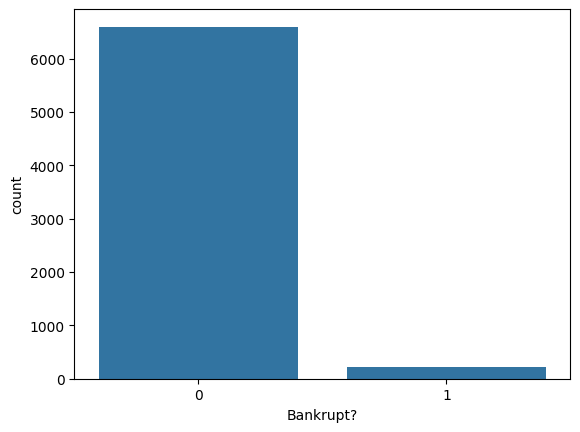

In [4]:
# Bankrupt 데이터 분포 -> 파산하지 않은 사람이 파산한 사람보다 30배 정도 많다.
sns.countplot(x='Bankrupt?', data=df)
df['Bankrupt?'].value_counts()

In [5]:
# 피처명 확인
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
# 데이터 요약
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [7]:
# 데이터셋 분리
X, y = df.drop('Bankrupt?', axis=1), df['Bankrupt?']

## 필수과제 1.2
- 다양한 피처선정을 배웠으니 최대한 모두 사용해서 어떤 피처를 선택할지를 꼭 정리하기!

In [8]:
# 상관계수
corr_matrix = df.corr()
corr = corr_matrix['Bankrupt?']

corr_features = corr[abs(corr) > 0.2].index
corr_features

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Net profit before tax/Paid-in capital',
       ' Retained Earnings to Total Assets', ' Net Income to Total Assets'],
      dtype='object')

### Variance Threshold

<BarContainer object of 95 artists>

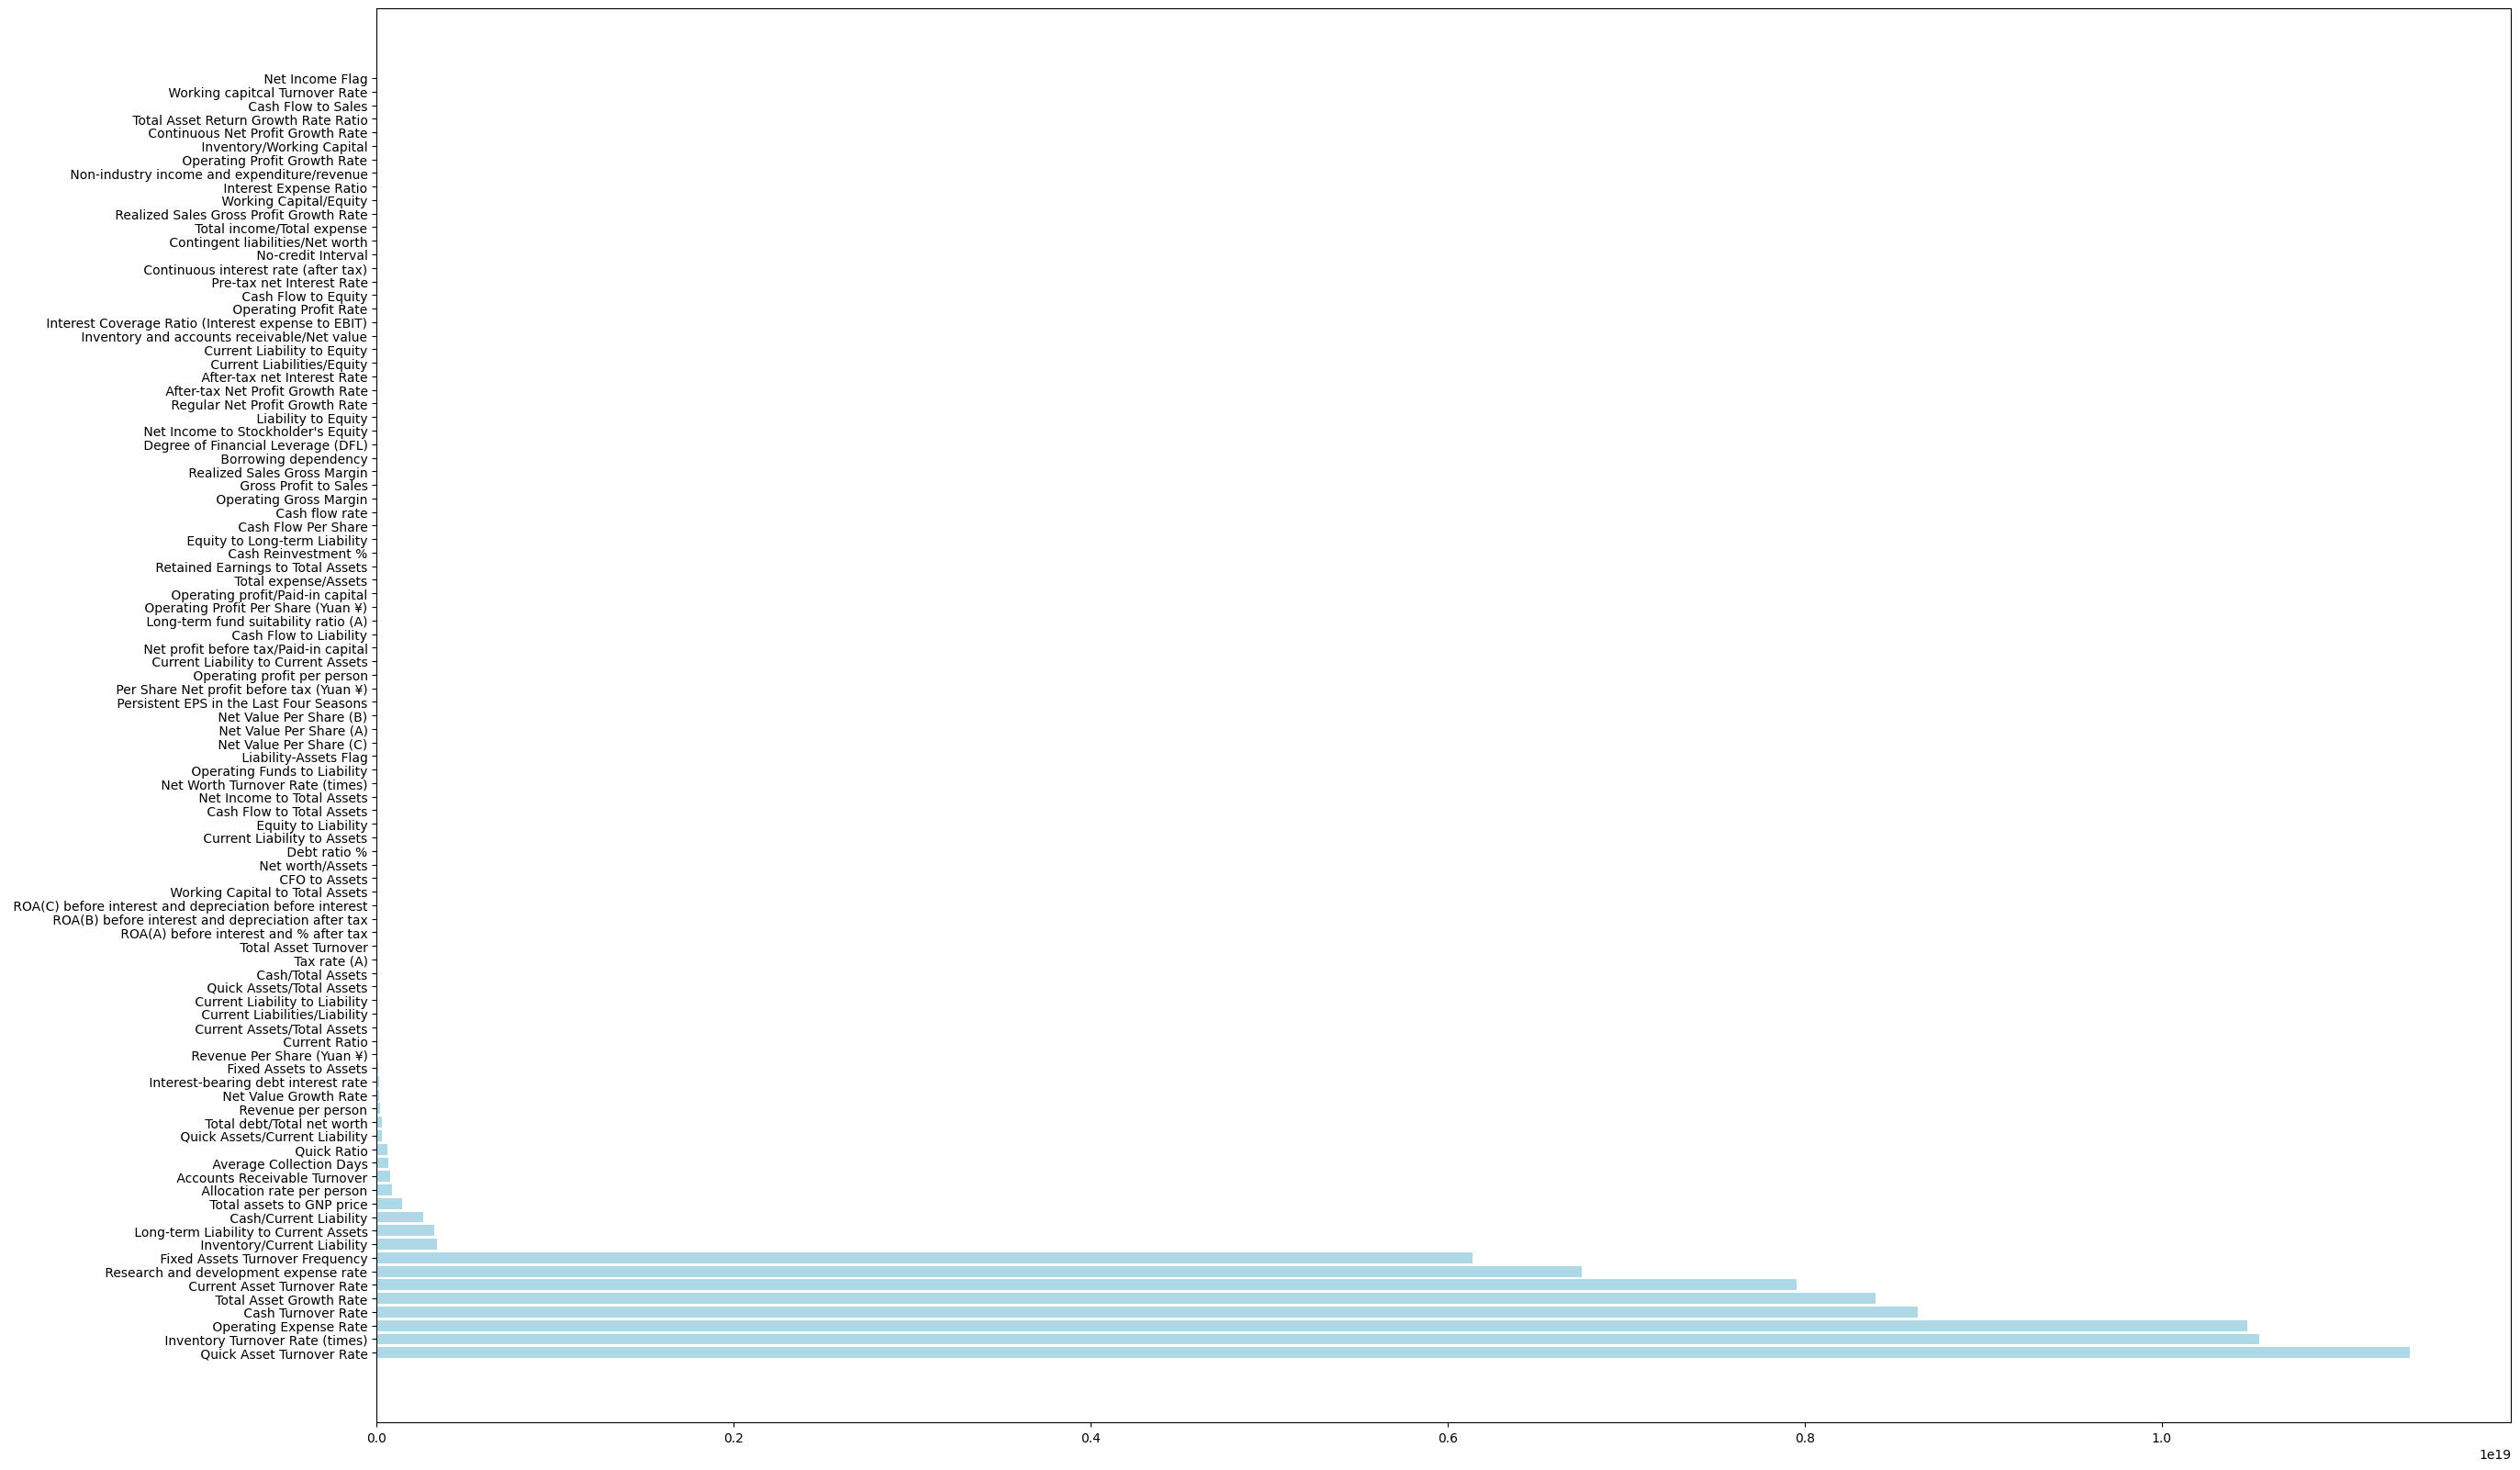

In [9]:
# 분산 임계값
threshold = 0.1
vt_selector = VarianceThreshold(threshold)
vt_selector.fit_transform(X)

# 시각화
vt_df = pd.DataFrame({'Features':X.columns , 'Variance':vt_selector.variances_})
vt_df = vt_df.sort_values(by='Variance',ascending=False)
plt.figure(figsize=(30,20))
plt.barh(vt_df['Features'], vt_df['Variance'], color='lightblue')

In [10]:
# Variance Threshold로 선택된 피처
vt_selected_features = X.columns[vt_selector.get_support(indices=True)]
print(vt_selected_features)
vt_df.head(24)

Index([' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)',
       ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio',
       ' Quick Ratio', ' Total debt/Total net worth',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Allocation rate per person',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Fixed Assets to Assets',
       ' Total assets to GNP price'],
      dtype='object')


,Features,Variance
71,Quick Asset Turnover Rate,1.138858e+19
47,Inventory Turnover Rate (times),1.054774e+19
10,Operating Expense Rate,1.048106e+19
73,Cash Turnover Rate,8.634240e+18
28,Total Asset Growth Rate,8.395537e+18
70,Current Asset Turnover Rate,7.957784e+18
11,Research and development expense rate,6.750129e+18
48,Fixed Assets Turnover Frequency,6.137390e+18
62,Inventory/Current Liability,3.387343e+17
66,Long-term Liability to Current Assets,3.251609e+17


- 71, 47, 10, 73, 28, 70, 11, 48, 62, 66, 58, 86, 52, 45, 46, 33, 57, 35, 50, 29, 13, 75, 20, 32

### Chi2

<BarContainer object of 95 artists>

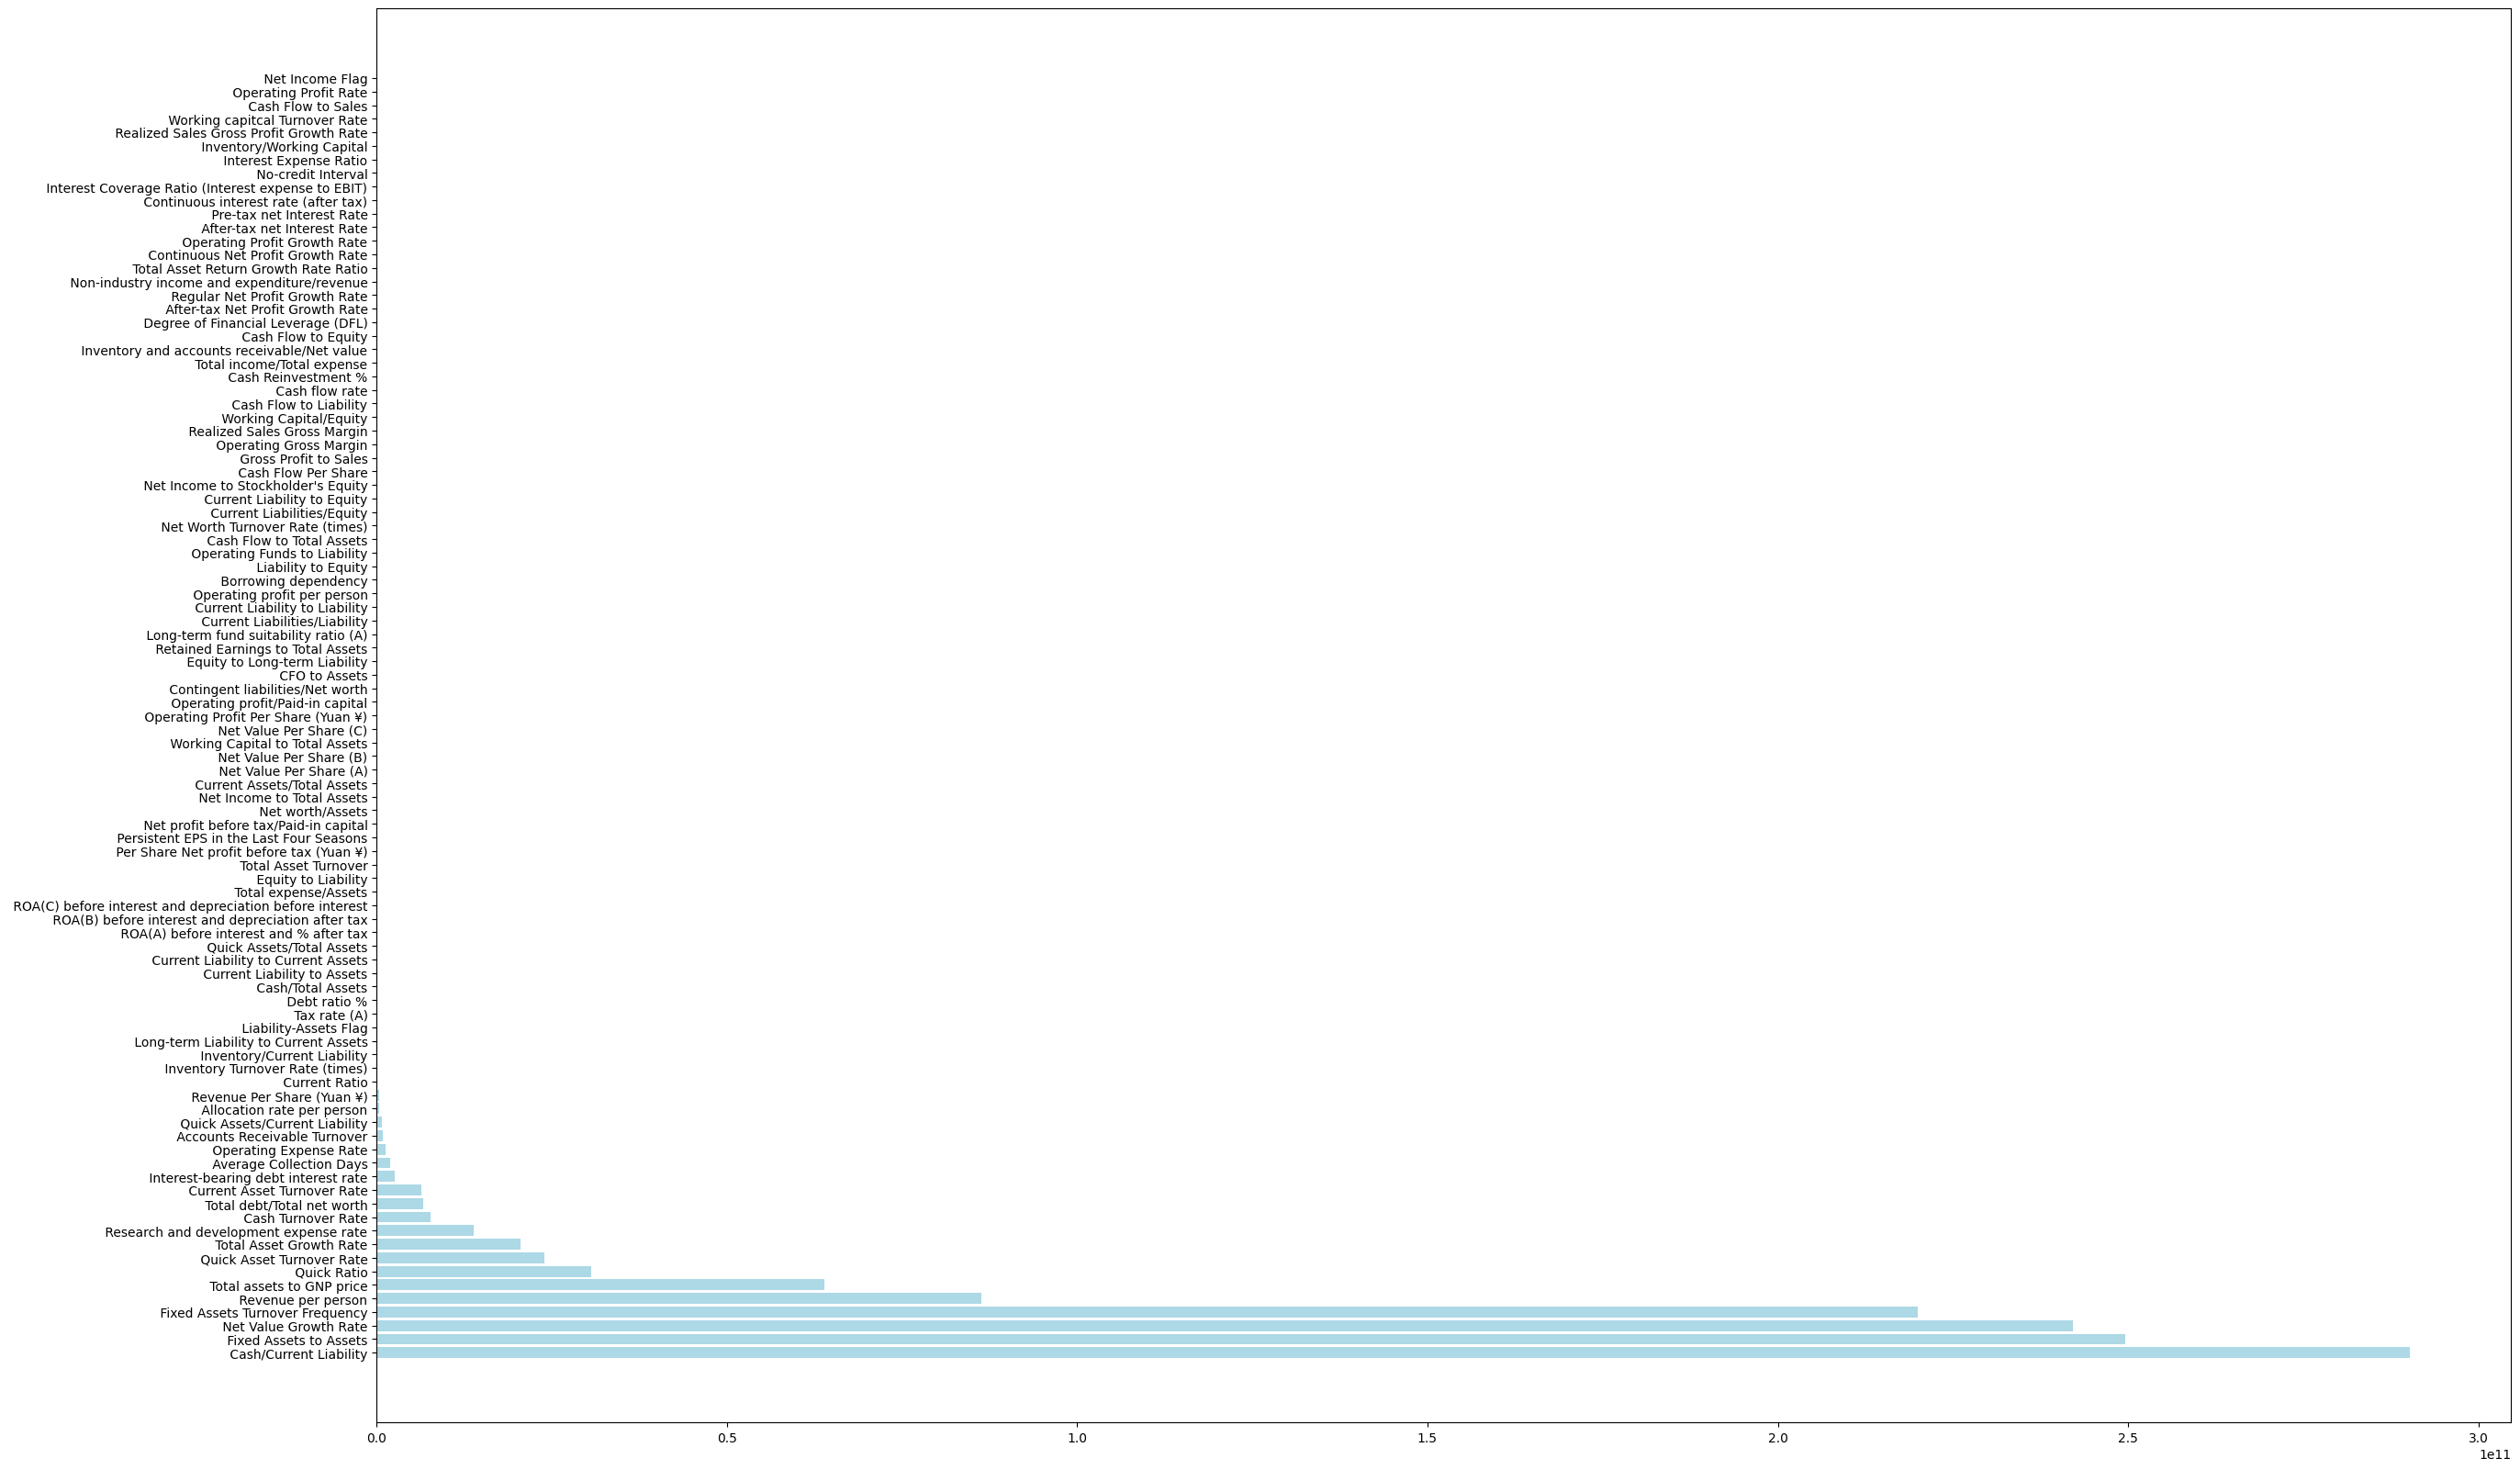

In [11]:
# 카이제곱
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X,y)

# 시각화
chi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score':chi_selector.scores_}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(30,20))
plt.barh(chi_scores_df['Feature'], chi_scores_df['Score'], color='lightblue')

In [12]:
# chi2으로 선택된 피처
chi_scores_df.head(20)

,Feature,Score
58,Cash/Current Liability,2.901545e+11
75,Fixed Assets to Assets,2.495621e+11
29,Net Value Growth Rate,2.421293e+11
48,Fixed Assets Turnover Frequency,2.200229e+11
50,Revenue per person,8.633138e+10
86,Total assets to GNP price,6.391313e+10
33,Quick Ratio,3.059892e+10
71,Quick Asset Turnover Rate,2.391564e+10
28,Total Asset Growth Rate,2.051825e+10
11,Research and development expense rate,1.385736e+10


- 58, 75, 29, 48, 50, 86, 33, 71, 28, 11, 73, 35, 70, 13, 46, 10, 45, 57, 52, 20




### MI

<BarContainer object of 95 artists>

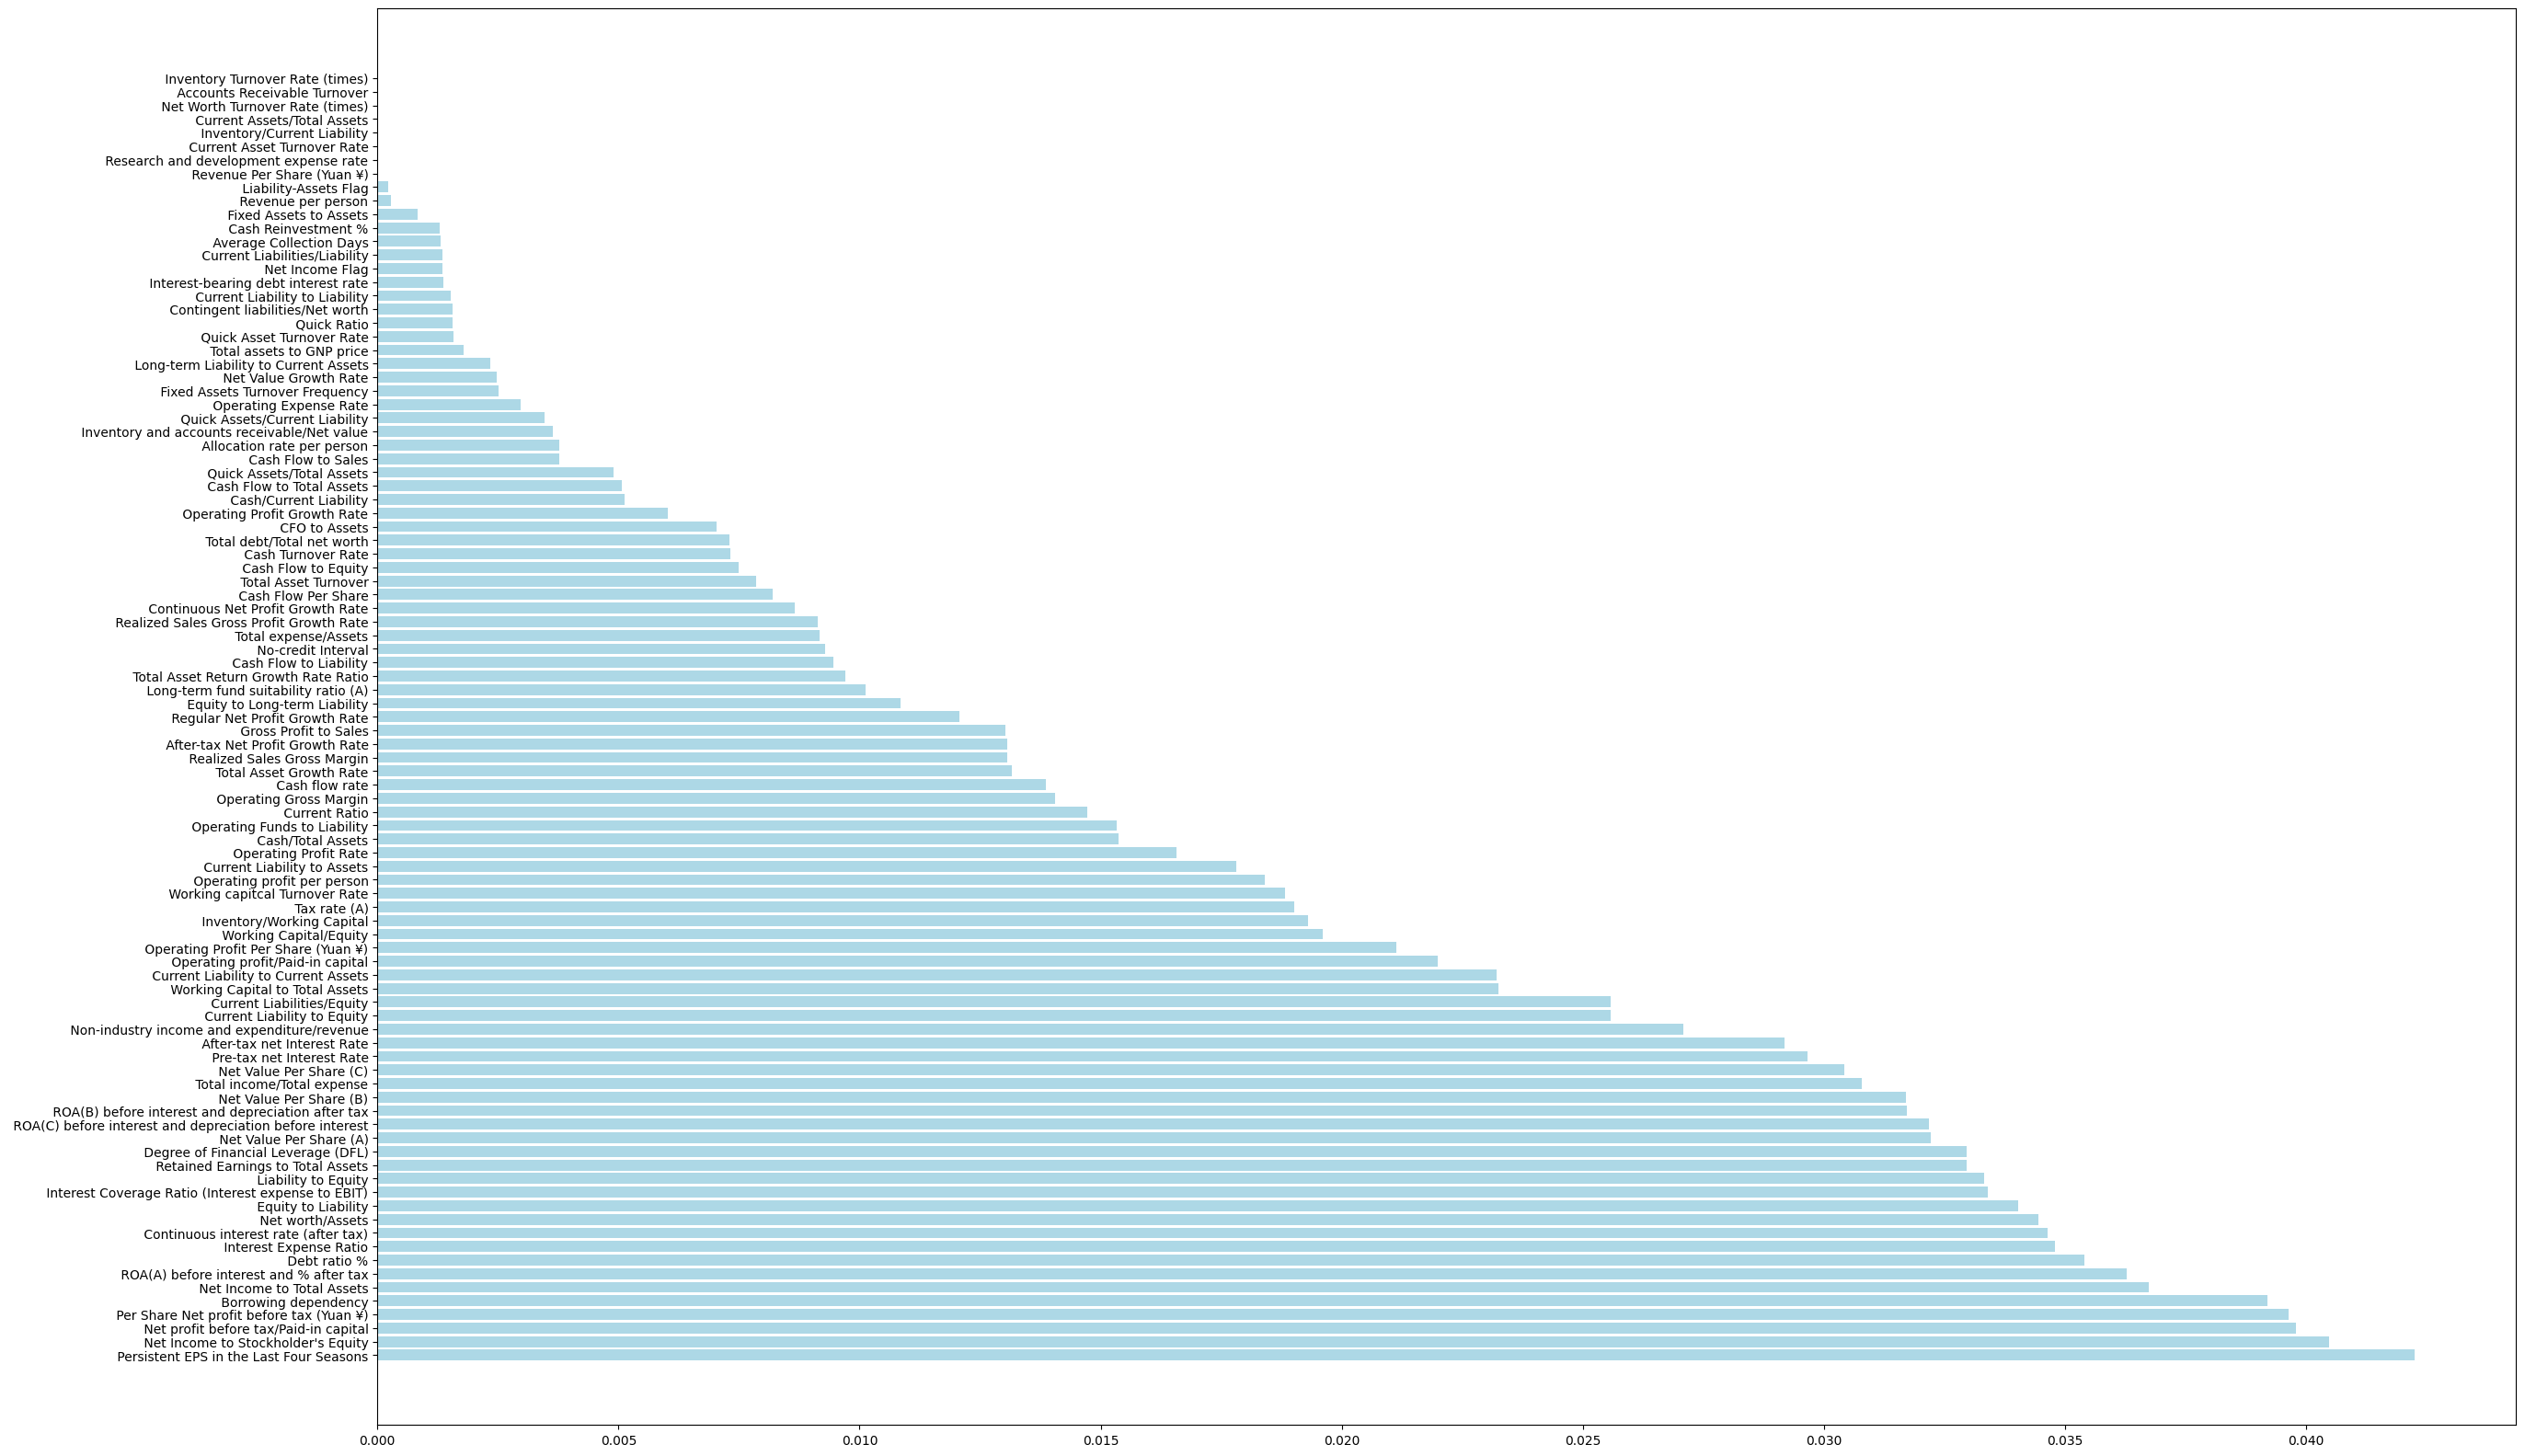

In [13]:
# MI
mi_scores = mutual_info_classif(X,y, discrete_features='auto', random_state=111)

# 시각화
mi_scores_df = pd.DataFrame({'Features':X.columns , 'MI Scores':mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Scores',ascending=False)
plt.figure(figsize=(30,20))
plt.barh(mi_scores_df['Features'], mi_scores_df['MI Scores'], color='lightblue')

In [32]:
# MI로 선택된 피처 -> 뮤추얼 정보를 제공하는 피처가 많으므로 feature_selection이 어려움,,
mi_scores_df

,Features,MI Scores
18,Persistent EPS in the Last Four Seasons,0.042240
89,Net Income to Stockholder's Equity,0.040483
42,Net profit before tax/Paid-in capital,0.039796
22,Per Share Net profit before tax (Yuan ¥),0.039632
39,Borrowing dependency,0.039205
...,...,...
62,Inventory/Current Liability,0.000000
55,Current Assets/Total Assets,0.000000
49,Net Worth Turnover Rate (times),0.000000
45,Accounts Receivable Turnover,0.000000


In [15]:
# 분산 임계값과 카이제곱으로 선택한 변수들의 공통변수 출력
vt = [71, 47, 10, 73, 28, 70, 11, 48, 62, 66, 58, 86, 52, 45, 46, 33, 57, 35, 50, 29, 13, 75, 20, 32]
chi = [58, 75, 29, 48, 50, 86, 33, 71, 28, 11, 73, 35, 70, 13, 46, 10, 45, 57, 52, 20]
intersection = list(set(vt).intersection(set(chi)))
vt_df.loc[intersection,]

,Features,Variance
10,Operating Expense Rate,1.048106e+19
11,Research and development expense rate,6.750129e+18
13,Interest-bearing debt interest rate,1.172176e+16
20,Revenue Per Share (Yuan ¥),2.673231e+15
28,Total Asset Growth Rate,8.395537e+18
29,Net Value Growth Rate,1.303046e+16
33,Quick Ratio,5.986185e+16
35,Total debt/Total net worth,2.835673e+16
45,Accounts Receivable Turnover,7.741718e+16
46,Average Collection Days,6.571025e+16


### SFS

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

sfs_forward 선택된 특성
(' Operating Expense Rate',)
sfs_backward 선택된 특성
(' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets Turnover Frequency', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Total assets to GNP price')
sfs_stepwise 선택된 특성
(' Operating Expense Rate',)


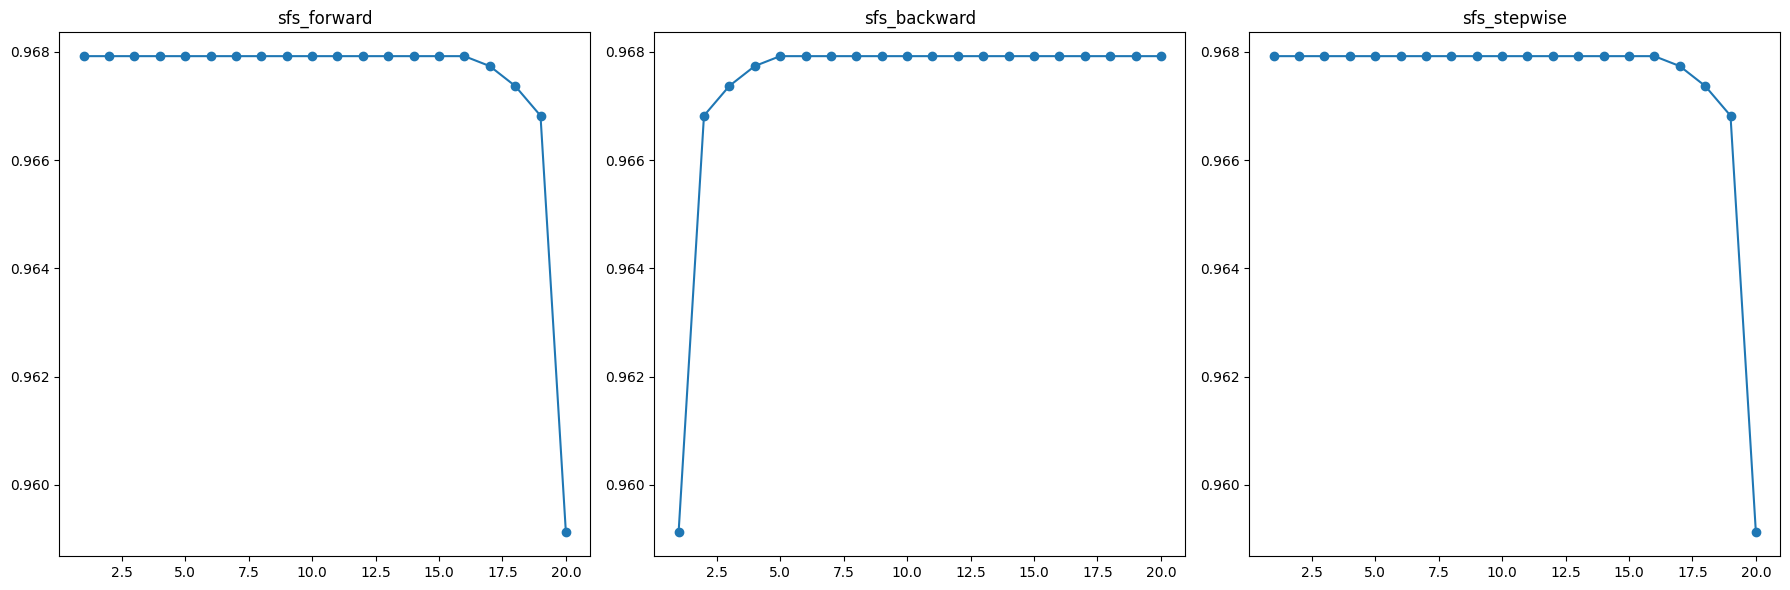

In [16]:
# SFS
X = df[[' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio',
        ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets Turnover Frequency', ' Revenue per person', ' Allocation rate per person', ' Quick Assets/Current Liability',
        ' Cash/Current Liability', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Cash Turnover Rate', ' Fixed Assets to Assets', ' Total assets to GNP price' ]]

# 훈련 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

# 로지스틱 회귀모델
model = LogisticRegression(max_iter = 300)

# SFS 전진, 후진, 단계선택법 저장
sfs_forward = SFS(model, k_features = 'best', forward = True, floating = False, scoring = 'accuracy', cv = 3)
sfs_backward = SFS(model, k_features = 'best', forward = False, floating = False, scoring = 'accuracy', cv = 3)
sfs_stepwise = SFS(model, k_features = 'best', forward = True, floating = True, scoring = 'accuracy', cv = 3)

# 데이터를 방법별로 학습
sfs_forward = sfs_forward.fit(X_train, y_train)
sfs_backward = sfs_backward.fit(X_train, y_train)
sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

# 선택된 특성 출력 -> 어떤 피처들이 선정되는지 ?
print('sfs_forward 선택된 특성')
print(sfs_forward.k_feature_names_)

print('sfs_backward 선택된 특성')
print(sfs_backward.k_feature_names_)

print('sfs_stepwise 선택된 특성')
print(sfs_stepwise.k_feature_names_)

# 실제 어떤 식으로 변화하는지 시각화로 체크
fig, ax = plt.subplots(1,3, figsize=(18,6))
ax[0].plot(range(1, len(sfs_forward.subsets_)+1),[sfs_forward.subsets_[i]['avg_score'] for i in sfs_forward.subsets_], marker = 'o')
ax[0].set_title('sfs_forward')

ax[1].plot(range(1, len(sfs_backward.subsets_)+1),[sfs_backward.subsets_[i]['avg_score'] for i in sfs_backward.subsets_], marker = 'o')
ax[1].set_title('sfs_backward')

ax[2].plot(range(1, len(sfs_stepwise.subsets_)+1),[sfs_stepwise.subsets_[i]['avg_score'] for i in sfs_stepwise.subsets_], marker = 'o')
ax[2].set_title('sfs_stepwise')

plt.tight_layout()
plt.show()

**SFS로 선택된 특성**

' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets Turnover Frequency', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Total assets to GNP price'

### RFECV

In [17]:
# RFECV
model = RandomForestClassifier()
cv = StratifiedKFold(3)

# RFECV 모델 생성 및 학습
selector = RFECV(estimator = model, step = 1, cv = cv)
selector = selector.fit(X, y)

# 최적의 특성 수와 선택된 특성 출력
print('최적의 피처 수', selector.n_features_)
print('최적의 피처', selector.support_)

최적의 피처 수 19
최적의 피처 [ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


**REFCV로 선택된 특성**

' Operating Expense Rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets Turnover Frequency', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Current Asset Turnover Rate', ' Total assets to GNP price'

In [18]:
# 최종 선택된 특성
sfs = [' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets Turnover Frequency', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Total assets to GNP price']
refcv = [' Operating Expense Rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets Turnover Frequency', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Current Asset Turnover Rate', ' Total assets to GNP price']
intersection2 = list(set(sfs).intersection(set(refcv)))
intersection2

[' Total debt/Total net worth',
 ' Current Asset Turnover Rate',
 ' Fixed Assets Turnover Frequency',
 ' Revenue Per Share (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Total assets to GNP price',
 ' Total Asset Growth Rate',
 ' Interest-bearing debt interest rate',
 ' Average Collection Days',
 ' Accounts Receivable Turnover',
 ' Quick Ratio',
 ' Allocation rate per person',
 ' Operating Expense Rate',
 ' Quick Assets/Current Liability']

## 필수과제 1.3

- 선정된 피처로 모델을 돌려서 ( 모델은 기본 베이스로만 하셔도 됩니다. ) 단 3개 이상은 모델을 사용하여서, 평가지표 정확도, 정밀도, f1, 재현율 다 정리하여서 어떤 모델과 어떤 피처가 최적인지를 공유해 주세요.

In [19]:
# 선정된 피처
X = df[[' Accounts Receivable Turnover',
 ' Net Value Growth Rate',
 ' Quick Assets/Current Liability',
 ' Total assets to GNP price',
 ' Revenue Per Share (Yuan ¥)',
 ' Average Collection Days',
 ' Fixed Assets Turnover Frequency',
 ' Interest-bearing debt interest rate',
 ' Quick Ratio',
 ' Operating Expense Rate',
 ' Current Asset Turnover Rate',
 ' Total Asset Growth Rate',
 ' Total debt/Total net worth',
 ' Allocation rate per person']]

# 훈련 데이터셋으로 분할
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=111)

In [25]:
# LogisticRegression
model1 = LogisticRegression()

# 학습
model1.fit(X_train, y_train)

# 예측
y_pred = model1.predict(X_test)

# 평가지표
model1_scores = {
    'Accuracy': accuracy_score(y_test,y_pred),
    'Precision': precision_score(y_test,y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 score': f1_score(y_test,y_pred)
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# RandomForest
model2 = RandomForestClassifier()

# 학습
model2.fit(X_train, y_train)

# 예측
y_pred = model2.predict(X_test)

# 평가지표
model2_scores = {
    'Accuracy': accuracy_score(y_test,y_pred),
    'Precision': precision_score(y_test,y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 score': f1_score(y_test,y_pred)
}

In [30]:
# SVC
model3 = SVC()

# 학습
model3.fit(X_train, y_train)

# 예측
y_pred = model3.predict(X_test)

# 평가지표
model3_scores = {
    'Accuracy': accuracy_score(y_test,y_pred),
    'Precision': precision_score(y_test,y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 score': f1_score(y_test,y_pred)
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# 모델 평가지표 비교
print('LogisticRegression', model1_scores)
print('RandomForest', model2_scores)
print('SVC', model3_scores)

LogisticRegression {'Accuracy': 0.966275659824047, 'Precision': 0.0, 'Recall': 0.0, 'F1 score': 0.0}
RandomForest {'Accuracy': 0.969208211143695, 'Precision': 0.6363636363636364, 'Recall': 0.15555555555555556, 'F1 score': 0.25}
SVC {'Accuracy': 0.967008797653959, 'Precision': 0.0, 'Recall': 0.0, 'F1 score': 0.0}


정확도를 비교하였을 때 **RandomForest**가 가장 적합한 모델이라고 할 수 있으며, 선정된 피처는 14개로 다음과 같다.

[' Total debt/Total net worth',
 ' Current Asset Turnover Rate',
 ' Fixed Assets Turnover Frequency',
 ' Revenue Per Share (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Total assets to GNP price',
 ' Total Asset Growth Rate',
 ' Interest-bearing debt interest rate',
 ' Average Collection Days',
 ' Accounts Receivable Turnover',
 ' Quick Ratio',
 ' Allocation rate per person',
 ' Operating Expense Rate',
 ' Quick Assets/Current Liability']